   ## Multivariable Regression 
## Introduction
Multivariable regression is a statistical technique that allows for the analysis of the relationship between multiple predictor variables and a single outcome variable. It is a powerful tool used in various fields such as economics, social sciences, and biomedical research. In this lecture, we will cover the concept of multiple linear regression and the assumptions, variable selection, and model evaluation techniques.

## Multiple Linear Regression
Multiple linear regression is an extension of simple linear regression. It is used when there are multiple predictor variables and one outcome variable. The equation for multiple linear regression can be represented as follows:

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_jX_k + \epsilon$

where Y is the outcome variable, X1, X2, ..., Xk are the predictor variables, a is the intercept, b1, b2, ..., bj are the regression coefficients, and $\epsilon$ is the error term.

The regression coefficients represent the change in the outcome variable for a one-unit increase in the predictor variable, while holding all other predictor variables constant.

## Assumptions of Multiple Linear Regression
There are several assumptions that must be met for multiple linear regression to be a valid statistical tool:

1. Linearity: The relationship between the predictor variables and the outcome variable should be linear.
2. Independence: The observations should be independent of each other.
3. Homoscedasticity: The variance of the error term should be constant across all levels of the predictor variables.
4. Normality: The error term should be normally distributed.
5. No multicollinearity: The predictor variables should not be highly correlated with each other.


## Variable Selection
One of the challenges of multiple linear regression is selecting the predictor variables to include in the model. There are several methods for variable selection, including:

1. Stepwise regression: This method adds or removes predictor variables from the model one at a time, based on statistical significance.
2. Best subset selection: This method examines all possible combinations of predictor variables and selects the combination that produces the best model fit.
3. Ridge regression: This method shrinks the regression coefficients towards zero to avoid overfitting.


## Model Evaluation
Once a multiple linear regression model has been built, it is important to evaluate its performance. There are several measures of model fit, including:

1. R-squared: This measures the proportion of the variation in the outcome variable that is explained by the predictor variables.
2. Adjusted R-squared: This is a modified version of R-squared that takes into account the number of predictor variables in the model.
3. Root mean squared error (RMSE): This measures the difference between the actual and predicted values of the outcome variable.
4. Residual plots: These plots can be used to assess whether the assumptions of multiple linear regression are being met.


## Conclusion

Multivariable regression is a powerful statistical tool that allows us to understand the relationship between several variables simultaneously. However, it is important to meet the assumptions of multiple linear regression, select the appropriate predictor variables, and evaluate the model's performance. By doing so, we can build a robust and accurate model that can be used to make predictions and inform decision-making.


Backward Elimination
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     75.70
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.51e-13
Time:                        05:08:17   Log-Likelihood:                -201.48
No. Observations:                  32   AIC:                             411.0
Df Residuals:                      28   BIC:                             416.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4988    125.70

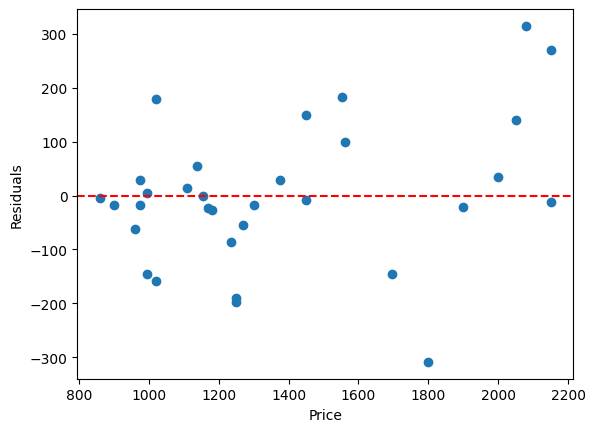

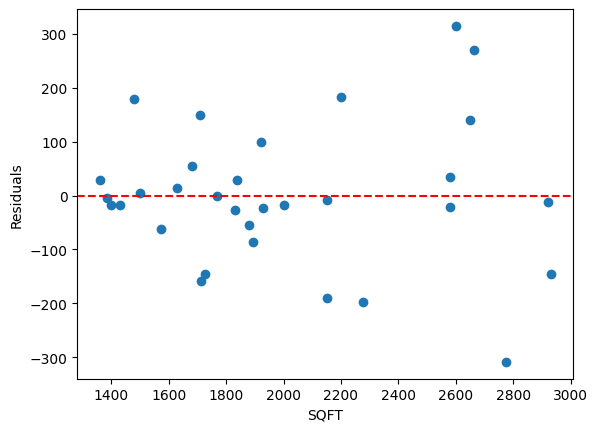

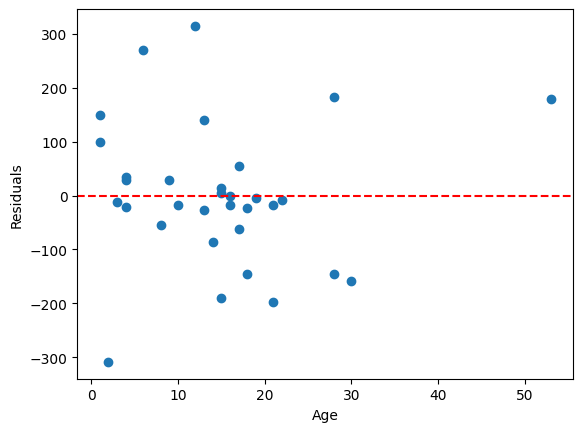

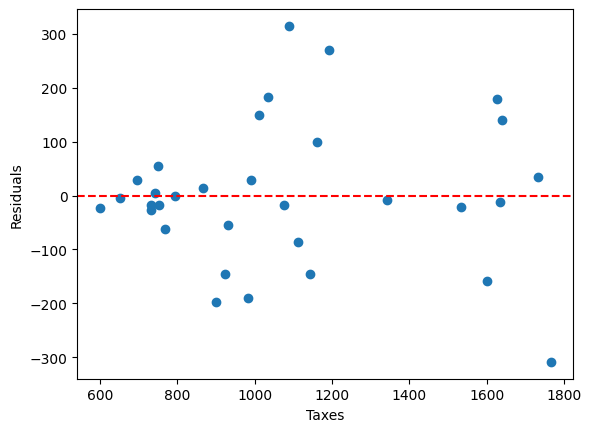

Prediction Interval:
[[566.86889539 813.1249661 ]]
Confidence Interval:
[[566.86889539 813.1249661 ]]


In [38]:
# This is the right code.
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the data into a DataFrame
data = pd.read_csv("HousePrice.csv")

# Perform backward elimination
X = data[['SQFT', 'AGE', 'Features', 'NE', 'CORNER', 'TAXES']]
y = data['PRICE']
X = sm.add_constant(X)  # Add a constant term
model_backward = sm.OLS(y, X)
results_backward = model_backward.fit()

while True:
    p_values = results_backward.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_index = p_values.idxmax()
        X = X.drop(max_p_index, axis=1)
        model_backward = sm.OLS(y, X)
        results_backward = model_backward.fit()
    else:
        break

print("Backward Elimination")
print(results_backward.summary())
print("R-squared:", results_backward.rsquared)
print()

# Residual analysis
price_res = results_backward.resid

# Plot residuals against PRICE
plt.scatter(data['PRICE'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.show()

# Plot residuals against SQFT
plt.scatter(data['SQFT'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('SQFT')
plt.ylabel('Residuals')
plt.show()

# Plot residuals against AGE
plt.scatter(data['AGE'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

# Plot residuals against TAXES
plt.scatter(data['TAXES'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Taxes')
plt.ylabel('Residuals')
plt.show()

# Perform predictions and intervals
new_data = pd.DataFrame({'const': 1, 'SQFT': [1087], 'AGE': [25], 'TAXES': [923]})
prediction = results_backward.get_prediction(new_data)
prediction_interval = prediction.conf_int()
print("Prediction Interval:")
print(prediction_interval)

confidence_interval = prediction.conf_int(alpha=0.05)
print("Confidence Interval:")
print(confidence_interval)

Backward Elimination
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     75.70
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.51e-13
Time:                        17:19:31   Log-Likelihood:                -201.48
No. Observations:                  32   AIC:                             411.0
Df Residuals:                      28   BIC:                             416.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4988    125.70

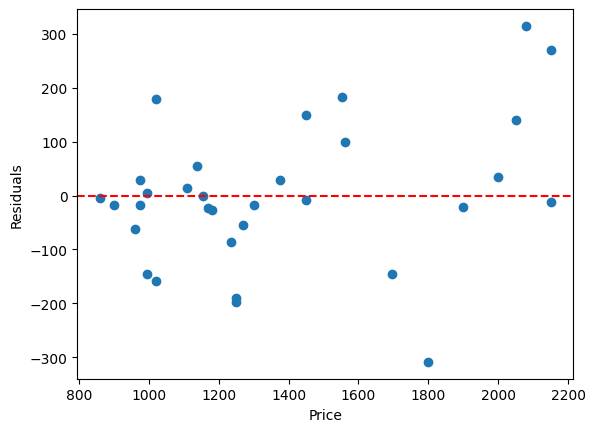

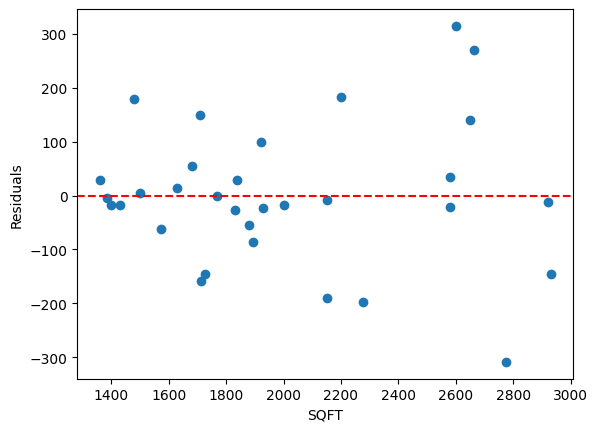

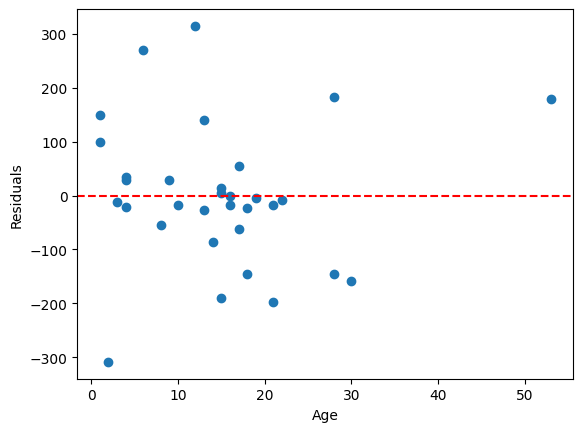

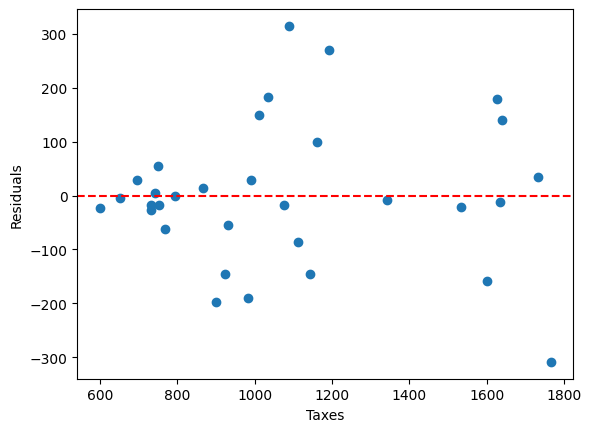

Prediction Interval:
[[566.86889539 813.1249661 ]]
Predicted Value:
[689.99693075]
Confidence Interval:
[[566.86889539 813.1249661 ]]


In [2]:
# The winner

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the data into a DataFrame
data = pd.read_csv("HousePrice.csv")

# Perform backward elimination
X = data[['SQFT', 'AGE', 'Features', 'NE', 'CORNER', 'TAXES']]
y = data['PRICE']
X = sm.add_constant(X)  # Add a constant term
model_backward = sm.OLS(y, X)
results_backward = model_backward.fit()

while True:
    p_values = results_backward.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_index = p_values.idxmax()
        X = X.drop(max_p_index, axis=1)
        model_backward = sm.OLS(y, X)
        results_backward = model_backward.fit()
    else:
        break

print("Backward Elimination")
print(results_backward.summary())
print("R-squared:", results_backward.rsquared)
print()

# Residual analysis
price_res = results_backward.resid

# Plot residuals against PRICE
plt.scatter(data['PRICE'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.show()

# Plot residuals against SQFT
plt.scatter(data['SQFT'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('SQFT')
plt.ylabel('Residuals')
plt.show()

# Plot residuals against AGE
plt.scatter(data['AGE'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

# Plot residuals against TAXES
plt.scatter(data['TAXES'], price_res)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Taxes')
plt.ylabel('Residuals')
plt.show()

# Perform predictions and intervals
new_data = pd.DataFrame({'const': 1, 'SQFT': [1087], 'AGE': [25], 'TAXES': [923]})
prediction = results_backward.get_prediction(new_data)
prediction_interval = prediction.conf_int()
predicted_value = prediction.predicted_mean
print("Prediction Interval:")
print(prediction_interval)
print("Predicted Value:")
print(predicted_value)

confidence_interval = prediction.conf_int(alpha=0.05)
print("Confidence Interval:")
print(confidence_interval)

(a) Regression price on the other variables. Write the fitted model. And specify model assumptions, and a all parameter estimates.

# Reduced Fitted Model:
$\hat{E}(price)$=38.50+.61*SQFT-8.71*AGE+0.22*TAXES

**Model Assumptions: eiid~N(0,$\sigma^2$)
1. Errors are normal with mean 0.
2. $\sigma^2$ is constant, homoscedasticity
3. e is independent


(b) Interpret model coefficients

SQFT: for each one unit increase in SQFT, the estimated price will increase by 0.61.
AGE: for each year increase in age, the estimated price will decrease by 8.71.
TAXES: for each one unit increase in taxes, the estimated price will increase by 0.22.

(c) How good is the fit of the model?
$R^2$=0.8902 because the $R^2$ is very high, the has a good fit. This means that aproximately 89% of variation in house price can be explained by the model.

(d) Conduct the model diagnostic check.

For the plots of residual againts age, the points for age in the residual plot are random and do not follow a specific pattern, showing the that the variable is a good fit in the model. Similary, is the same for the QSTR, and TAXES.

(e) Suppose a real estate agent wants to put a house on the market. The agent measurements of the independent variable as: SQRT=1082, AGE =25, FEATURE=10, NE=0, CONER=1, TAXES=923. What price should the agent put in the multiple listing?

Price = 38.50 +.61(1087)-8.71(25)+.22(923)=686.88
Where when use the full predicted value is 690

(f) Find the 95% prediction interval for this price house?

We are 95% confident that the mean price of a house is between $\$566.87$ to  $\$813.12$ in thousand. 

**A survey of 48 employees of a large company was conducted with the purpose of determining how satisfied they are with their jobs. Such demographic variables as gender, age, and education (Bachelor, Master, or Doctoral degree) were recorded. The total satisfaction score was calculated as a sum of scores on 20 questions on a 5-point Likert scale. We use these data to develop a regression model that relates the job satisfaction score to the other variables. First, we plot the histogram for the scores, and conduct the normality tests.**

In [18]:
import pandas as pd
import plotly.express as px
from scipy.stats import norm
import numpy as np
import plotly.graph_objs as go
from statsmodels.formula.api import ols

# Load the data from CSV
df = pd.read_csv('data.csv')


# Create a histogram
fig = px.histogram(df, x="score",
                   title="The total satisfaction score")
fig.show()


# Encode categorical features  
df = pd.get_dummies(df, columns=['gender', 'educ'])

# Define formula 
formula = 'score ~ C(gender_M) + C(educ_bachelor) + C(educ_doctoral) + age'

# Fit ANOVA model
model = ols(formula, data=df).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.364
Date:                Tue, 15 Aug 2023   Prob (F-statistic):             0.0176
Time:                        21:12:46   Log-Likelihood:                -180.47
No. Observations:                  48   AIC:                             370.9
Df Residuals:                      43   BIC:                             380.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**A small-scale clinical trial is conducted to compare the efficacy of two drugs (A and B) in reduction of excess body weight. Drug (A or B), age, and gender were recorded at the baseline. The percent excess body weight loss (EWL) was recorded 3 months into the study. The data are available on 32 subjects:**

In [20]:
import pandas as pd
import plotly.express as px
from scipy.stats import norm
import numpy as np
import plotly.graph_objs as go
from statsmodels.formula.api import ols

# Load the data from CSV
df = pd.read_csv('EBW.csv')


# Create a histogram
fig = px.histogram(df, x="EWL",
                   title="The percent excess body weight loss")
fig.show()


# Encode categorical features  
df = pd.get_dummies(df, columns=['drug', 'gender'])

# Define formula 
formula = 'EWL ~ C(gender_F) + C(drug_B) + age'

# Fit ANOVA model
model = ols(formula, data=df).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    EWL   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2.796
Date:                Tue, 15 Aug 2023   Prob (F-statistic):             0.0585
Time:                        21:16:07   Log-Likelihood:                -98.440
No. Observations:                  32   AIC:                             204.9
Df Residuals:                      28   BIC:                             210.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.2146    

(a) Verify normality of the response variable, then fit the linear regression model to the data. State the fittted model. Give estimates for all parameters.

(b) Which regression coecients turn out to be signifficant at the 5%? Discuss goodness-of-it of the model.

(c) Is one of the drugs more efficient for weight loss than the other? Interpret all estimated significant coeficients.

(d) According to the model, what is the predicted percent decrease in excess body weight for a 35-year-old male who is taking drug A?